In [ ]:
import pandas as pd


In [ ]:
!sudo apt-get install python3-tk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
!pip install datasets

In [ ]:

!pip install transformers

In [ ]:
!pip install transformers datasets accelerate

In [ ]:

'''
from transformers import BertTokenizer, BertForQuestionAnswering, Trainer, TrainingArguments
from datasets import load_dataset, Dataset

# Load the dataset
dataset = load_dataset("csv", data_files={"train": "400Data.csv"})

# Preprocess the data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["Context"], examples["Question"], examples["Answer"], truncation=True, padding="max_length")

dataset = dataset.map(preprocess_function, batched=True)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=2,
)

# Set up the model
model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")

# Define a custom compute_metrics function
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).sum() / len(labels)}

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train() '''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: "Invalid key: 0. Please first select a split. For example: `my_dataset_dictionary['train'][0]`. Available splits: ['train']"

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
'''
# Load the dataset
from datasets import load_dataset

dataset = load_dataset("csv", data_files={"train": "400Data.csv"})

# Preprocess the data
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["Context"], examples["Question"], examples["Answer"], truncation=True, padding="max_length")

dataset = dataset.map(preprocess_function, batched=True)

# Set up training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=2,
)

# Set up the model
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")

# Define a custom compute_metrics function
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).sum() / len(labels)}

# Create the Trainer
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()'''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
df = pd.read_csv("400Data.csv")  # Replace "your_data.csv" with the path to your CSV file
df.dropna(subset=["Question"], inplace=True)
df.isnull().sum()

Context            0
Question           0
Answer             0
Hallucination      0
Prediction       401
dtype: int64

In [ ]:
# Step 2: Preprocess the Text Data
texts = df[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(x), axis=1)  # Concatenate three text columns into one
labels = df['Hallucination'].values

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 4: Vectorize the Text Data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vectorized, y_train)

# Step 6: Make Predictions
y_pred = clf.predict(X_test_vectorized)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8641975308641975



# Step 1: Load the Data
df = pd.read_csv("400Data.csv")  # Replace "your_data.csv" with the path to your CSV file
df.dropna(subset=["Question"], inplace=True)
df.isnull().sum()

# Step 2: Preprocess the Text Data
texts = df[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(x), axis=1)  # Concatenate three text columns into one
labels = df['Hallucination'].values

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 4: Vectorize the Text Data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy')  # Change the criterion to 'entropy'
clf.fit(X_train_vectorized, y_train)

# Step 6: Make Predictions
y_pred = clf.predict(X_test_vectorized)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)


In [51]:
# Step 1: Load the Data
df = pd.read_csv("400Data.csv")  # Replace "your_data.csv" with the path to your CSV file
df.dropna(subset=["Question"], inplace=True)
df.isnull().sum()

# Step 2: Preprocess the Text Data
texts = df[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(map(str, x)), axis=1)  # Handle non-string values
labels = df['Hallucination'].values

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 4: Vectorize the Text Data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vectorized, y_train)

# Step 6: Make Predictions
y_pred = clf.predict(X_test_vectorized)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Load the new data from a CSV file
new_data = pd.read_csv("result.csv")  # Replace "new_data.csv" with the path to your new data file

# Step 9: Preprocess the new text data
new_texts = new_data[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(map(str, x)), axis=1)  # Handle non-string values

# Step 10: Vectorize the new text data
new_texts_vectorized = vectorizer.transform

Accuracy: 0.8641975308641975


In [52]:
y=clf.predict(vectorizer.transform(X_train))
accuracy_score(y_train,y)

1.0

In [65]:
# prompt: remove overfitting from above code

# Step 1: Load the Data
df = pd.read_csv("400Data.csv")  # Replace "your_data.csv" with the path to your CSV file
df.dropna(subset=["Question"], inplace=True)
df.isnull().sum()

# Step 2: Preprocess the Text Data
texts = df[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(map(str, x)), axis=1)  # Handle non-string values
labels = df['Hallucination'].values

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 4: Vectorize the Text Data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vectorized, y_train)

# Step 6: Make Predictions
y_pred = clf.predict(X_test_vectorized)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Load the new data from a CSV file
new_data = pd.read_csv("result.csv")  # Replace "new_data.csv" with the path to your new data file

# Step 9: Preprocess the new text data
new_texts = new_data[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(map(str, x)), axis=1)  # Handle non-string values

# Step 10: Vectorize the new text data
new_texts_vectorized = vectorizer.transform
y=clf.predict(vectorizer.transform(X_train))
accuracy_score(y_train,y)

# Step 11: Reduce Overfitting
# Option 1: Use Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())

# Option 2: Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
clf_grid = GridSearchCV(clf, parameters, cv=5)
clf_grid.fit(X_train_vectorized, y_train)
print("Best parameters:", clf_grid.best_params_)

# Option 3: Use Regularization
clf_reg = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
clf_reg.fit(X_train_vectorized, y_train)
y_pred_reg = clf_reg.predict(X_test_vectorized)
accuracy_reg = accuracy_score(y_test, y_pred_reg)
print("Accuracy with regularization:", accuracy_reg)

# Step 12: Choose the best model based on the evaluation results and use it to make predictions on the new data
best_model = clf  # Choose the best model based on your evaluation criteria
new_predictions = best_model.predict(vectorizer.transform(new_texts))

# Step 13: Analyze the results and draw conclusions
# ...
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.8641975308641975
Cross-validation accuracy: 0.75625
Best parameters: {'max_depth': 10, 'n_estimators': 150}
Accuracy with regularization: 0.7654320987654321
Accuracy: 0.8641975308641975
Precision: 0.84375
Recall: 0.9818181818181818


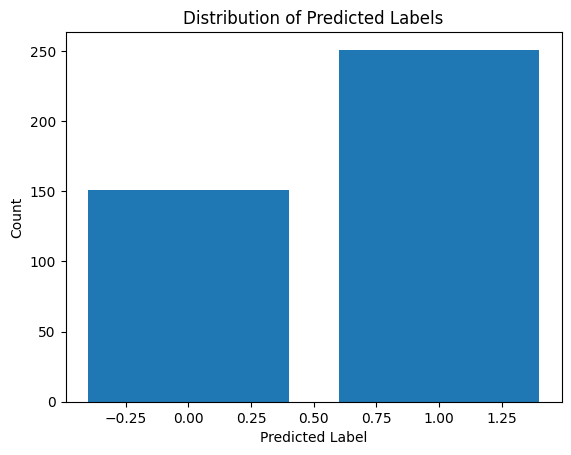

In [66]:

# Step 14: Visualize the results
import matplotlib.pyplot as plt

# Create a bar chart to visualize the distribution of predicted labels
labels, counts = np.unique(new_predictions, return_counts=True)
plt.bar(labels, counts)
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predicted Labels")
plt.show()

# Step 15: Write the results to a file
with open("predictions.csv", "w") as f:
    f.write("Context,Question,Answer,Prediction\n")
    for i in range(len(new_texts)):
        f.write(f"{new_data['Context'][i]},{new_data['Question'][i]},{new_data['Answer'][i]},{new_predictions[i]}\n")


In [54]:
y=clf.predict(vectorizer.transform(X_train))
accuracy_score(y_train,y)

1.0

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
df = pd.read_csv("400Data.csv")
df.dropna(subset=["Question"], inplace=True)

# Step 2: Preprocess the Text Data
texts = df[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(map(str, x)), axis=1)
labels = df['Hallucination'].values

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 4: Vectorize the Text Data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vectorized, y_train)

# Step 6: Make Predictions on New Data
new_data = pd.read_csv("400Data.csv")
new_texts = new_data[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(map(str, x)), axis=1)
new_texts_vectorized = vectorizer.transform(new_texts)
new_predictions = clf.predict(new_texts_vectorized)

# Step 7: Save the Predictions to the Result File
result_df = pd.read_csv("result.csv")
result_df["Prediction"] = new_predictions
result_df.to_csv("result.csv", index=False)

In [ ]:
# prompt: check the values of  result.csv in column Hallucination and Prediction how many are matching

import pandas as pd

# Load the result.csv file
result_df = pd.read_csv("result.csv")

# Count the number of matching values between Hallucination and Prediction columns
matching_values = (result_df["Hallucination"] == result_df["Prediction"]).sum()

# Print the number of matching values
print(f"Number of matching values: {matching_values}")
